In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

## 1. 데이터 불러오기

### Boston Housing Dataset

- 보스턴 주택 가격 데이터
- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- 총 13가지의 요소들과 주택 가격으로 이루어져 있음.

### 데이터 호출

In [4]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_boston = raw_df.values[1::2, 2]
column_names = ['CRM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KWAK\AppData\Local\Temp\ipykernel_9876\1469471495.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)


### 데이터 분할
- Training set 70%, Test set 30% 무작위 추출을 이용하여 나누기


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size = 0.3, random_state=123)

## 2. 앙상블

### 2.0 Decision Tree

In [6]:
tree = DecisionTreeRegressor(max_depth = 5,    #아래 그림이 나오게 빈칸에 의사결정나무 함수 작성
                             random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### 예측

In [7]:
tree_pred = tree.predict(X_test)
print(np.power(y_test-tree_pred,2).mean())

17.602204873990754


### 2.1 Bagging

### 모형적합

In [8]:
tree = DecisionTreeRegressor()
bag_model = BaggingRegressor(tree, n_estimators=1000,
                             max_samples=0.8, random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=1000, random_state=1)

### 예측

In [9]:
bag_pred = bag_model.predict(X_test)
print(np.mean(np.abs(y_test - bag_pred)))    #MAE 계산식 작성 (모르겠으면 위에꺼 참고)

2.3376190789473736


### 2.2 Random Forest

### 모형적합

In [10]:
rf_model = RandomForestRegressor(n_estimators=100,  #아래 그림처럼 나오게 하이퍼파라미터 작성
                                 max_features='sqrt',
                                 min_samples_leaf=4)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4)

In [11]:
rf_model = RandomForestRegressor(n_estimators=100,  # 트리의 개수
                                 max_features='sqrt',  # 각 트리에서 사용할 최대 피처 수
                                 min_samples_leaf=4)  # 리프 노드가 되기 위한 최소 샘플 수
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4)

### 예측

In [12]:
from sklearn.metrics import mean_squared_error

rf_pred = rf_model.predict(X_test)
print(mean_squared_error(y_test, rf_pred))  #MSE계산식 작성

17.92330591282207


In [13]:
from sklearn.metrics import mean_squared_error

rf_pred = rf_model.predict(X_test)
print(mean_squared_error(y_test, rf_pred))  # MSE 계산식

17.92330591282207


### 2.3 Boosting

### 모형적합

In [14]:
gbm_model = GradientBoostingRegressor(n_estimators=1000,  #그래디언트부스팅함수 작성
                                      max_depth=3)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [15]:
gbm_model = GradientBoostingRegressor(n_estimators=1000, max_depth=3)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

### 예측

In [16]:
gbm_pred = gbm_model.predict(X_test)
print(np.power(y_test-gbm_pred,2).mean())

13.288562084173725


### Partial Dependence Plot

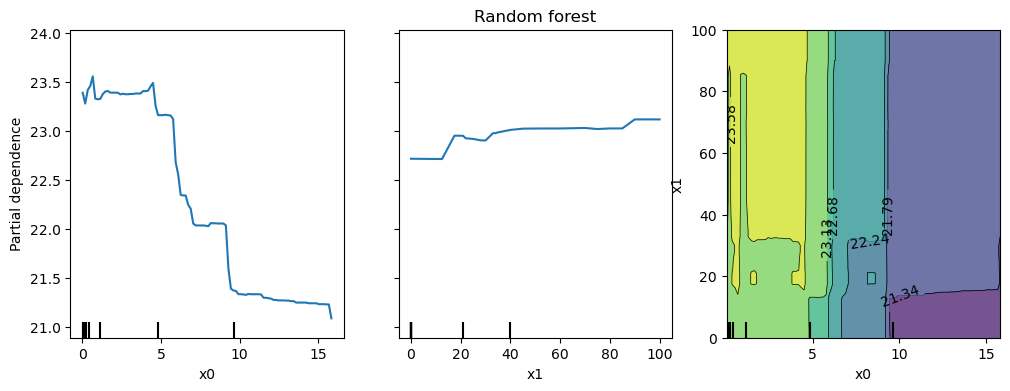

In [17]:
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Random forest', fontsize=12)
tree_disp = PartialDependenceDisplay.from_estimator(rf_model, X_train, [0,1,[0,1]], ax=ax)

### 각 그래프를 해석하시오
1.x축은 feature0, y.축은 모델의 예측값을 나타내는 그래프일 때, feature0 값이 증가할수록 에측값이 감소하는 경향을 보인다. 특히, feature0값이 약 10을 넘어가면, 에측값이 급격히 감소한다. \
\
2. x축은 feature1, y축은 예측값을 나타내며, feature1 값이 증가할 때, 예측값이 증가하긴 하나, 거의 일정한 수준을 유지하는 것으로 보아 feature1은 모델 예측에 영향을 많이 주지 않는 변수라고 할 수 있다. \
\
3. x푹은 feature0을, y축은 feature1의 범위를 나타낼 때, feature0의 값에 따라 모델의 예측값(색상)이 변화하는 정도가 더 크기 때문에 feature0이 모델의 예측에 영향을 더 많이 끼치는 변수인 것을 알 수 있다.

### 각 그래프를 해석하시오
1. **첫 번째 그래프 (Feature 0의 부분 종속성 플롯)**:
   - 이 그래프는 Feature 0이 모델의 예측에 미치는 영향을 보여줍니다.
   - X축은 Feature 0의 값 범위를 나타내고, Y축은 모델의 예측 값입니다.
   - 그래프의 형태를 통해 Feature 0의 값이 증가하거나 감소할 때 모델의 예측이 어떻게 변하는지 알 수 있습니다.

2. **두 번째 그래프 (Feature 1의 부분 종속성 플롯)**:
   - 이 그래프는 Feature 1이 모델의 예측에 미치는 영향을 보여줍니다.
   - X축은 Feature 1의 값 범위를 나타내고, Y축은 모델의 예측 값입니다.
   - 그래프의 형태를 통해 Feature 1의 값이 증가하거나 감소할 때 모델의 예측이 어떻게 변하는지 알 수 있습니다.

3. **세 번째 그래프 (Feature 0과 Feature 1의 상호작용 부분 종속성 플롯)**:
   - 이 그래프는 Feature 0과 Feature 1의 상호작용이 모델의 예측에 미치는 영향을 보여줍니다.
   - X축은 Feature 0의 값 범위를, Y축은 Feature 1의 값 범위를 나타내며, 색상은 모델의 예측 값을 나타냅니다.
   - 이 그래프를 통해 두 피처가 함께 모델의 예측에 어떻게 영향을 미치는지 알 수 있습니다. 예를 들어, 특정 값 조합에서 예측 값이 급격히 변하는지 등을 확인할 수 있습니다.

### Variable Importance Plot

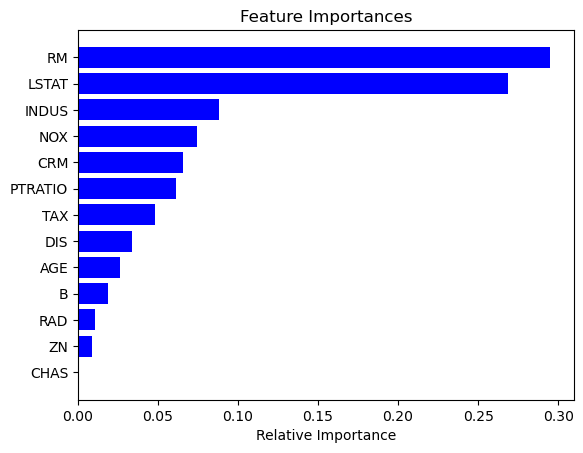

In [18]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()